## ESE_417 Final Project

In [229]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd   
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

## Preprocessing

In [230]:
data = pd.read_csv('winequality-red.csv',delimiter = ';')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [231]:
#Summarative functions
data.dtypes
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


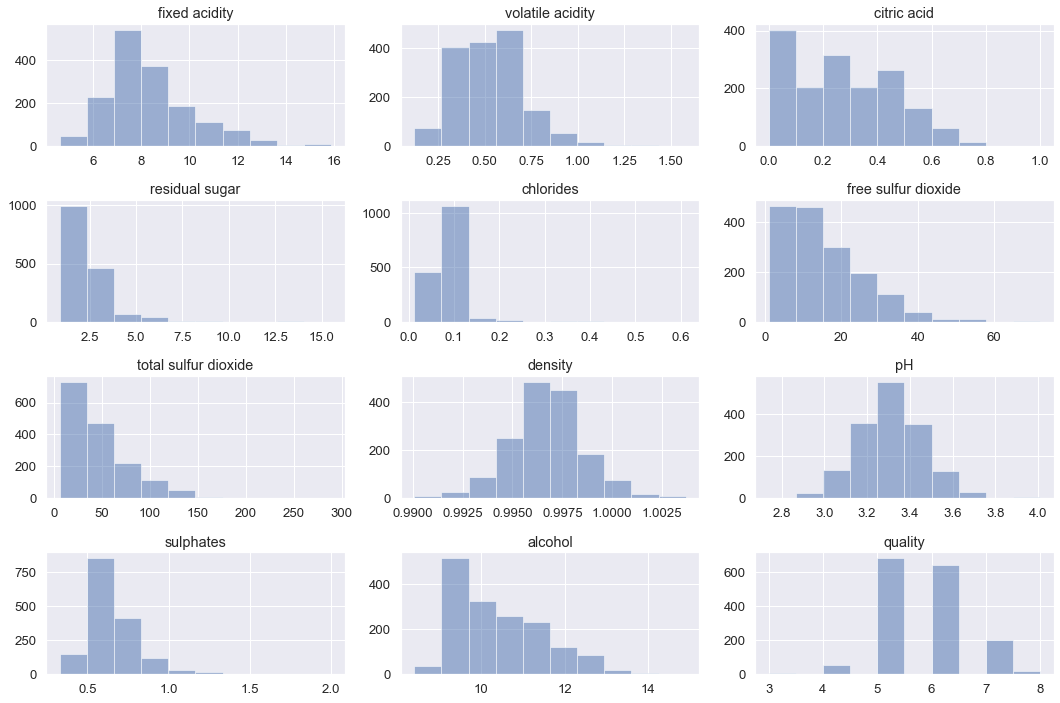

In [232]:
data.hist(alpha=0.5, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [233]:
#check whether there are NAs in dataset
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [234]:
X = data.loc[:,'fixed acidity':'alcohol']
y = data['quality']

In [235]:
XX = data.loc[:, 'fixed acidity':'alcohol']
yy = data['quality']

bestFeatures = SelectKBest(score_func = f_regression, k = 11)
bestFeaturesFit = bestFeatures.fit(X , y)
dfscores = pd.DataFrame(bestFeaturesFit.scores_)  #Store predictor scores in a column 
dfcolumns = pd.DataFrame(X.columns)  #Store predictor variable names in a column

predScores = pd.concat([dfcolumns,dfscores],axis=1)
predScores.columns = ['Predictor','Score']   #naming the dataframe columns
print(predScores.nlargest(13,'Score'))

               Predictor       Score
10               alcohol  468.267011
1       volatile acidity  287.444450
9              sulphates  107.740433
2            citric acid   86.257726
6   total sulfur dioxide   56.657818
7                density   50.405223
4              chlorides   26.985608
0          fixed acidity   24.960038
8                     pH    5.340462
5    free sulfur dioxide    4.108502
3         residual sugar    0.301184


<AxesSubplot:>

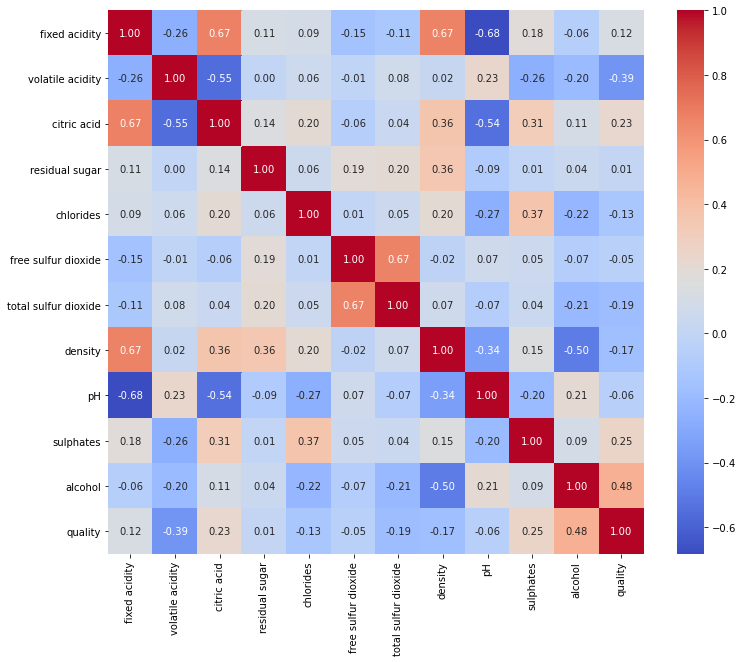

In [119]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm',fmt='.2f')

In [120]:
cor_data = data.drop(['pH','free sulfur dioxide','residual sugar'], axis=1)
cor_data.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


## Artificial Neural Networks

In [219]:
X = df_max_scaled.loc[:,'fixed acidity':'alcohol']
y = cor_data['quality']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=112)

In [220]:
m = MLPClassifier()
parameters = {'solver':['lbfgs', 'sgd', 'adam'],
              'hidden_layer_sizes' : [10,50,100,150,200]}
cv_rfc = GridSearchCV(m,parameters)
cv_rfc.fit(X_train,y_train)
print(cv_rfc.best_params_)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.

{'hidden_layer_sizes': 150, 'solver': 'lbfgs'}


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [221]:
MLP = MLPClassifier(activation = 'identity',solver = 'lbfgs', hidden_layer_sizes = (150,), alpha=1e-2, max_iter = 400,learning_rate_init = 0.1)
MLP.fit(X_train,y_train)
y_pred = MLP.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test,y_pred)
print(confusion)
clas = classification_report(y_pred, y_test)
print(clas)
print(accuracy)

[[  0   0   2   0   0   0]
 [  0   0   6   8   0   0]
 [  0   0 155  57   2   0]
 [  0   0  63 119  18   0]
 [  0   0   1  28  15   0]
 [  0   0   0   3   3   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.72      0.68      0.70       227
           6       0.59      0.55      0.57       215
           7       0.34      0.39      0.37        38
           8       0.00      0.00      0.00         0

    accuracy                           0.60       480
   macro avg       0.28      0.27      0.27       480
weighted avg       0.64      0.60      0.62       480

0.6020833333333333


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


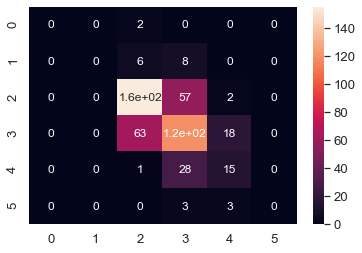

In [224]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()

### Random Forest Classifier

In [213]:
X = cor_data.loc[:,'fixed acidity':'alcohol']
y = cor_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=113)

In [171]:
forest = RandomForestClassifier()
parameters = {'max_depth':np.arange(1,30,1),
              'n_estimators':np.arange(1,30,1)}
cv_rfc = GridSearchCV(forest,parameters)
cv_rfc.fit(X_train,y_train)
print(cv_rfc.best_params_)

{'max_depth': 25, 'n_estimators': 26}


In [184]:
forest = RandomForestClassifier(n_estimators=25,max_depth=26)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(confusion)
print('Accuracy is',accuracy)

[[  0   0   1   1   0   0]
 [  0   0   9   5   0   0]
 [  0   0 170  42   2   0]
 [  0   0  50 140  10   0]
 [  0   0   1  26  16   1]
 [  0   0   0   1   5   0]]
Accuracy is 0.6791666666666667


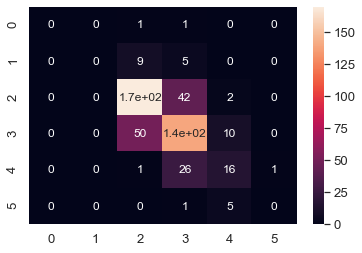

In [185]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()